# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [ ]:
arr = np.zeros((5,3),dtype=int)
in_pd = pd.DataFrame(arr,columns=['A', 'B', 'C'])

**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

It will automatically assign integers starting from 0 for columns as well as rows.

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [ ]:
arr = np.zeros((5,3),dtype=int)
in_pd = pd.DataFrame(arr,index = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],columns=['January', 'February', 'March'])

**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

In [ ]:
import seaborn as sns
available_datasets = sns.get_dataset_names()
print("Available Seaborn Datasets:", available_datasets)
df_penguins = sns.load_dataset('penguins')
print(df_penguins.head())

Available Seaborn Datasets: ['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [ ]:
url = "https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df_homes = pd.read_csv(url)

**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [ ]:
df_homes.to_csv("zillow_home_data.csv", index=False)

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [ ]:
df_homes_2 = pd.read_csv("zillow_home_data.csv")

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [ ]:
dim_df_homes = df_homes.shape
dim_df_homes_2 = df_homes_2.shape

**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [ ]:

url = "https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx"
feb = pd.read_excel(url, sheet_name='February 2022', index_col=0)

**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [ ]:
feb['Percentage Increase'] = ((feb['This Month'] - feb['Last Month']) / feb['Last Month']) * 100

## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [ ]:
df_penguins = sb.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [ ]:
print("Number of rows and columns:", df_penguins.shape)

Number of rows and columns: (344, 7)


**13.** How might you show the first few rows of df_penguins?

In [ ]:
print(df_penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [ ]:
unique_species = df_penguins['species'].unique()
num_unique_species = df_penguins['species'].nunique()
print("Unique species:", unique_species)
print("Number of unique species:", num_unique_species)

Unique species: ['Adelie' 'Chinstrap' 'Gentoo']
Number of unique species: 3


**15.** What function can we use to drop the rows that have missing data?

dropna() function

**16.** By default, will this modify df_penguins or will it return a copy?

It does not modify the original DataFrame . It will return a copy.

**17.** How can we override the default?

If we want the operation to modify the original DataFrame, the inplace parameter can be set to True.

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [ ]:
df_penguins_full = df_penguins.dropna()

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [ ]:
average_bill_length = df_penguins_full['bill_length_mm'].mean()
print(f"The average bill length of a penguin, in millimeters is {average_bill_length:.2f} .")

The average bill length of a penguin, in millimeters is 43.99 .


**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

b)Flipper length

In [ ]:
df_numeric = df_penguins_full.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()
print(correlation_matrix['bill_length_mm'])

bill_length_mm       1.000000
bill_depth_mm       -0.228626
flipper_length_mm    0.653096
body_mass_g          0.589451
Name: bill_length_mm, dtype: float64


**21.** How could you show the median flipper length, grouped by species?

In [ ]:
median_flipper_length = df_penguins_full.groupby('species')['flipper_length_mm'].median()
print(median_flipper_length)

species
Adelie       190.0
Chinstrap    196.0
Gentoo       216.0
Name: flipper_length_mm, dtype: float64


**22.** Which species has the longest flippers?

Gentoo species

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

Adelie and Chinstrap

In [ ]:
mean_body_mass = df_penguins_full.groupby('species')['body_mass_g'].mean()
pairwise_differences = mean_body_mass.values[:, np.newaxis] - mean_body_mass.values
pairwise_differences = np.abs(pairwise_differences)
np.fill_diagonal(pairwise_differences, np.inf)
min_diff = pairwise_differences.min()
min_diff_species = np.unravel_index(pairwise_differences.argmin(), pairwise_differences.shape)
species_names = mean_body_mass.index
print(f"The two species with the most similar mean body mass are {species_names[min_diff_species[0]]} and {species_names[min_diff_species[1]]} with a mean body mass difference of {min_diff:.2f} grams.")

The two species with the most similar mean body mass are Adelie and Chinstrap with a mean body mass difference of 26.92 grams.


**24.** How could you sort the rows by bill length?

In [ ]:
df_sorted = df_penguins_full.sort_values(by='bill_length_mm', ascending=True)


**25.** How could you run the same sort in descending order?

In [ ]:
df_sorted_descending = df_penguins_full.sort_values(by='bill_length_mm', ascending=False)


**26.** How could you sort by species first, then by body mass?

In [ ]:
df_sorted = df_penguins_full.sort_values(by=['species', 'body_mass_g'], ascending=[True, True])
print(df_sorted.head())


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
58   Adelie     Biscoe            36.5           16.6              181.0   
64   Adelie     Biscoe            36.4           17.1              184.0   
54   Adelie     Biscoe            34.5           18.1              187.0   
98   Adelie      Dream            33.1           16.1              178.0   
116  Adelie  Torgersen            38.6           17.0              188.0   

     body_mass_g     sex  
58        2850.0  Female  
64        2850.0  Female  
54        2900.0  Female  
98        2900.0  Female  
116       2900.0  Female  


## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [ ]:
diamonds = sns.load_dataset('diamonds')

**28.** Display the columns that are available.

In [ ]:
diamonds = sns.load_dataset('diamonds')
print(diamonds.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

<class 'pandas.core.series.Series'>

**30.** Select the 'table' column and show its type

In [ ]:
diamonds = sns.load_dataset('diamonds')
table_column = diamonds['table']
print(type(table_column))

<class 'pandas.core.series.Series'>


**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [ ]:
diamonds = sns.load_dataset('diamonds')
subset = diamonds[['price', 'carat']].head(10)
print(subset)


   price  carat
0    326   0.23
1    326   0.21
2    327   0.23
3    334   0.29
4    335   0.31
5    336   0.24
6    336   0.24
7    337   0.26
8    337   0.22
9    338   0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [ ]:
diamonds = sns.load_dataset('diamonds')
print(diamonds['price'].dtype)


int64


**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [ ]:
diamonds = sns.load_dataset('diamonds')
row = diamonds.iloc[0]

**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [ ]:
print("Data type of the row:", type(row))

Data type of the row: <class 'pandas.core.series.Series'>


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [ ]:
print(row)

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object


**36.** Select the row with the highest priced diamond.

In [ ]:
highest_priced_diamond = diamonds.loc[diamonds['price'].idxmax()]

**37.** Select the row with the lowest priced diamond.

In [ ]:
lowest_priced_diamond = diamonds.loc[diamonds['price'].idxmin()]

## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [ ]:
taxis = sns.load_dataset('taxis')

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [ ]:
taxis['pickup_time'] = pd.to_datetime(taxis['pickup'])

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [ ]:
taxis['pickup_time'] = pd.to_datetime(taxis['pickup'])
start_time = pd.to_datetime('2019-03-23 00:06:00')
end_time = pd.to_datetime('2019-03-24 00:00:00')
taxis_one_day = taxis[(taxis['pickup_time'] >= start_time) & (taxis['pickup_time'] < end_time)]


**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [ ]:
# if 'pickup' in taxis.columns:
taxis['pickup_time'] = pd.to_datetime(taxis['pickup'])
taxis_one_day = taxis[(taxis['pickup_time'] >= '2019-03-23 00:06:00') & (taxis['pickup_time'] < '2019-03-24 00:00:00')]
taxis_one_day.set_index('pickup_time', inplace=True)
numeric_columns = taxis_one_day.select_dtypes(include=[np.number]).columns
df_means = taxis_one_day[numeric_columns].resample('H').mean()
print(df_means)



                     passengers  distance       fare       tip     tolls  \
pickup_time                                                                
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000  0.000000   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000  0.000000   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818  0.000000   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000  0.000000   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000  0.000000   
2019-03-23 05:00:00    2.000000  1.270000   6.000000  0.980000  0.000000   
2019-03-23 06:00:00    1.000000  0.400000  21.500000  0.000000  0.000000   
2019-03-23 07:00:00    2.333333  0.980000   5.250000  1.165000  0.000000   
2019-03-23 08:00:00    1.000000  0.020000   2.500000  0.000000  0.000000   
2019-03-23 09:00:00    1.500000  1.352000   7.400000  1.674000  0.000000   
2019-03-23 10:00:00    1.000000  1.760000   8.750000  0.727500  0.000000   
2019-03-23 1

<ipython-input-65-a38316370a53>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_means = taxis_one_day[numeric_columns].resample('H').mean()


**42.** Create a simple line plot of the value "distance".  

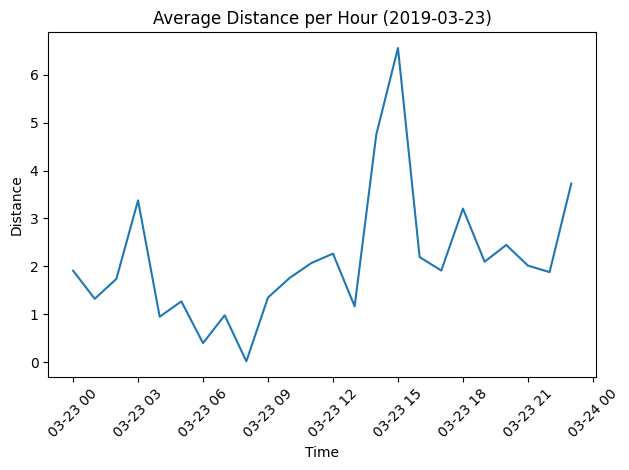

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_means.index, df_means['distance'])
plt.title('Average Distance per Hour (2019-03-23)')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**43.** Overall, do riders travel further or less far as the day progresses?




Riders travel further as the day progresses.

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [ ]:
df_means['tip_in_percent'] = (df_means['tip'] / df_means['fare']) * 100
print(df_means[['fare', 'tip', 'tip_in_percent']].head())

                          fare       tip  tip_in_percent
pickup_time                                             
2019-03-23 00:00:00   8.583333  1.415000       16.485437
2019-03-23 01:00:00   7.875000  1.525000       19.365079
2019-03-23 02:00:00   8.181818  1.641818       20.066667
2019-03-23 03:00:00  11.750000  2.410000       20.510638
2019-03-23 04:00:00   5.500000  0.915000       16.636364


**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [ ]:
df_means['time_interval'] = range(len(df_means))
print(df_means[['time_interval']].head())

                     time_interval
pickup_time                       
2019-03-23 00:00:00              0
2019-03-23 01:00:00              1
2019-03-23 02:00:00              2
2019-03-23 03:00:00              3
2019-03-23 04:00:00              4


Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [ ]:
correlation_tip_distance = df_means['tip_in_percent'].corr(df_means['distance'])
correlation_tip_passengers = df_means['tip_in_percent'].corr(df_means['passengers'])
correlation_tip_time_interval = df_means['tip_in_percent'].corr(df_means['time_interval'])
print(f"Correlation between 'tip_in_percent' and 'distance': {correlation_tip_distance:.2f}")
print(f"Correlation between 'tip_in_percent' and 'passengers': {correlation_tip_passengers:.2f}")
print(f"Correlation between 'tip_in_percent' and 'time_interval': {correlation_tip_time_interval:.2f}")


Correlation between 'tip_in_percent' and 'distance': 0.01
Correlation between 'tip_in_percent' and 'passengers': 0.33
Correlation between 'tip_in_percent' and 'time_interval': -0.23


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

tip_in_percent and passengers

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

It seems that people do not tip more as the day progresses.